In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
import seaborn as sns

In [10]:
from wordcloud import WordCloud

In [11]:
from collections import Counter

In [12]:
from sklearn.linear_model import LogisticRegression 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
import xgboost as xgb

In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords

In [17]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [18]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [20]:
df.describe(include="all")

,Review,Liked
count,1000,1000.00000
unique,996,NaN
top,I would not recommend this place.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [21]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [22]:
df.shape

(1000, 2)

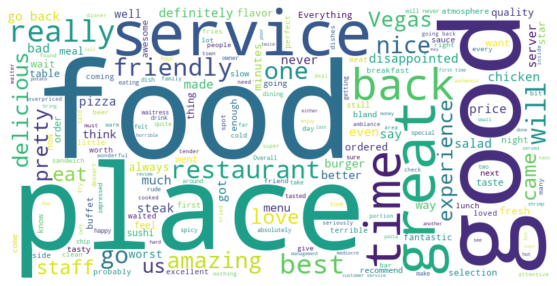

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Review']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))


In [26]:
def RemoveStopWords(ele):
    lis=ele.split()
    result=[]
    
    for i in lis:
        if i not in stop_words:
            result.append(i)
    
    return " ".join(result)
    

In [27]:
df['Review']=df['Review'].apply(RemoveStopWords)

In [28]:
df

,Review,Liked
0,Wow... Loved place.,1
1,Crust good.,0
2,Not tasty texture nasty.,0
3,Stopped late May bank holiday Rick Steve recom...,1
4,The selection menu great prices.,1
...,...,...
995,I think food flavor texture lacking.,0
996,Appetite instantly gone.,0
997,Overall I impressed would go back.,0
998,"The whole experience underwhelming, I think we...",0


In [29]:
word_freq = Counter(' '.join(df['Review']).split())


In [30]:
word_freq

Counter({'Wow...': 1,
         'Loved': 2,
         'place.': 20,
         'Crust': 1,
         'good.': 22,
         'Not': 11,
         'tasty': 6,
         'texture': 3,
         'nasty.': 1,
         'Stopped': 2,
         'late': 1,
         'May': 1,
         'bank': 1,
         'holiday': 1,
         'Rick': 1,
         'Steve': 1,
         'recommendation': 3,
         'loved': 6,
         'it.': 16,
         'The': 177,
         'selection': 7,
         'menu': 9,
         'great': 37,
         'prices.': 3,
         'Now': 4,
         'I': 294,
         'getting': 7,
         'angry': 1,
         'want': 13,
         'damn': 3,
         'pho.': 1,
         'Honeslty': 1,
         'taste': 9,
         'THAT': 1,
         'fresh.)': 1,
         'potatoes': 2,
         'like': 45,
         'rubber': 1,
         'could': 16,
         'tell': 6,
         'made': 15,
         'ahead': 1,
         'time': 35,
         'kept': 5,
         'warmer.': 1,
         'fries': 8,
         '

In [31]:
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count']).reset_index()


In [32]:
word_freq_df = word_freq_df.rename(columns={'index': 'word'})


In [33]:
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)


In [34]:
word_freq_df

,word,count
25,I,294
19,The,177
126,food,80
85,place,76
155,good,56
...,...,...
1321,gross.,1
1318,unbelievably,1
1317,truly,1
1316,coupons.,1


<AxesSubplot:xlabel='word', ylabel='count'>

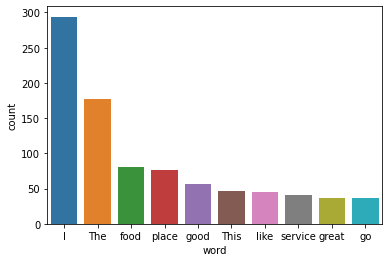

In [35]:
sns.barplot(x=word_freq_df['word'][:10],y=word_freq_df['count'][:10])

In [36]:
df

,Review,Liked
0,Wow... Loved place.,1
1,Crust good.,0
2,Not tasty texture nasty.,0
3,Stopped late May bank holiday Rick Steve recom...,1
4,The selection menu great prices.,1
...,...,...
995,I think food flavor texture lacking.,0
996,Appetite instantly gone.,0
997,Overall I impressed would go back.,0
998,"The whole experience underwhelming, I think we...",0


In [37]:
X=df['Review']

In [38]:
y=df['Liked']

In [39]:
X

0                                    Wow... Loved place.
1                                            Crust good.
2                               Not tasty texture nasty.
3      Stopped late May bank holiday Rick Steve recom...
4                       The selection menu great prices.
                             ...                        
995                 I think food flavor texture lacking.
996                             Appetite instantly gone.
997                   Overall I impressed would go back.
998    The whole experience underwhelming, I think we...
999    Then, I wasted enough life there, poured salt ...
Name: Review, Length: 1000, dtype: object

In [40]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [42]:
tdidf_Vectorizer=TfidfVectorizer(max_features=30000)


In [43]:
tdidf_Vectorizer

TfidfVectorizer(max_features=30000)

In [44]:
# Fiting and transforming the training data


In [45]:
X_train_tfidf=tdidf_Vectorizer.fit_transform(X_train)

In [46]:
X_train_tfidf

<670x1600 sparse matrix of type '<class 'numpy.float64'>'
	with 4239 stored elements in Compressed Sparse Row format>

In [47]:
# Transforming the testing data


In [48]:
X_test_tfidf=tdidf_Vectorizer.transform(X_test)

In [49]:
X_test_tfidf

<330x1600 sparse matrix of type '<class 'numpy.float64'>'
	with 1547 stored elements in Compressed Sparse Row format>

# RandomForestClassifier

In [50]:
rfc=RandomForestClassifier()


In [51]:
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [52]:
y_pred=rfc.predict(X_train_tfidf)


In [53]:
accuracy_score(y_train,y_pred)

1.0

In [54]:
y_pred=rfc.predict(X_test_tfidf)


In [55]:
accuracy_score(y_test,y_pred)

0.7363636363636363

In [56]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

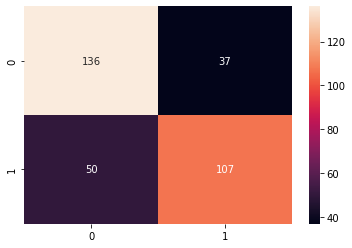

In [57]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       173
           1       0.74      0.68      0.71       157

    accuracy                           0.74       330
   macro avg       0.74      0.73      0.73       330
weighted avg       0.74      0.74      0.74       330



In [59]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=rfc.predict(input_tfidf)
    return predicted_label

In [60]:
user_input=input("Enter a comment")


Enter a commentlove the food


In [61]:
emotion=predict_emotion(user_input)


In [62]:
print(emotion)

[1]


# LogisticRegression

In [63]:
lr=LogisticRegression()



In [64]:
lr.fit(X_train_tfidf,y_train)

LogisticRegression()

In [65]:
y_pred=lr.predict(X_train_tfidf)


In [66]:
accuracy_score(y_train,y_pred)

0.9492537313432836

In [67]:
y_pred=lr.predict(X_test_tfidf)


In [68]:
accuracy_score(y_test,y_pred)

0.7818181818181819

In [69]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

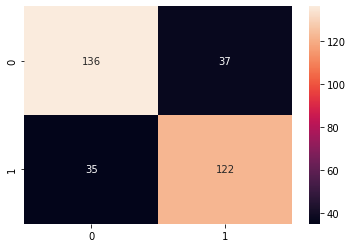

In [70]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       173
           1       0.77      0.78      0.77       157

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



In [72]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=lr.predict(input_tfidf)
    return predicted_label

In [73]:
user_input=input("Enter a comment")


Enter a commentThe Burrittos Blah


In [74]:
emotion=predict_emotion(user_input)


In [75]:
print(emotion)

[0]


# KNeighborsClassifier

In [76]:
knc=KNeighborsClassifier()


In [77]:
knc.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [78]:
y_pred=knc.predict(X_train_tfidf)


In [79]:
accuracy_score(y_train,y_pred)

0.8462686567164179

In [80]:
y_pred=knc.predict(X_test_tfidf)


In [81]:
accuracy_score(y_test,y_pred)

0.7424242424242424

In [82]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

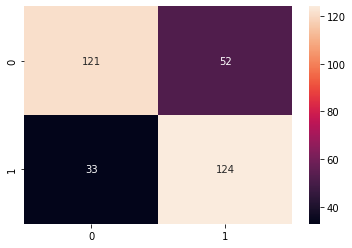

In [83]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       173
           1       0.70      0.79      0.74       157

    accuracy                           0.74       330
   macro avg       0.75      0.74      0.74       330
weighted avg       0.75      0.74      0.74       330



In [85]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=knc.predict(input_tfidf)
    return predicted_label

In [86]:
user_input=input("Enter a comment")


Enter a commentThey never brought a salad we asked for


In [87]:
emotion=predict_emotion(user_input)


In [88]:
print(emotion)

[0]


# XGBClassifier

In [89]:
xgb_i=xgb.XGBClassifier()

In [90]:
xgb_i.fit(X_train_tfidf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
y_pred=xgb_i.predict(X_train_tfidf)


In [92]:
accuracy_score(y_train,y_pred)

0.9328358208955224

In [93]:
y_pred=xgb_i.predict(X_test_tfidf)


In [94]:
accuracy_score(y_test,y_pred)

0.706060606060606

In [95]:
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

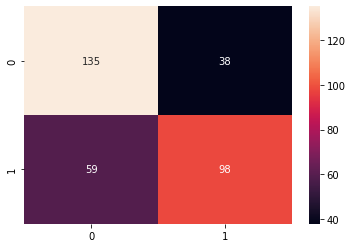

In [96]:
sns.heatmap(data=cm,fmt='d',annot=True)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       173
           1       0.72      0.62      0.67       157

    accuracy                           0.71       330
   macro avg       0.71      0.70      0.70       330
weighted avg       0.71      0.71      0.70       330



In [98]:
def predict_emotion(ele):
    ele=[ele]
    input_tfidf=tdidf_Vectorizer.transform(ele)
    predicted_label=xgb_i.predict(input_tfidf)
    return predicted_label

In [99]:
user_input=input("Enter a comment")


Enter a commentThe only redeeming quality of the restaurant was that it was very inexpensive


In [100]:
emotion=predict_emotion(user_input)


In [101]:
print(emotion)

[0]
